  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Country_encoded  \
0  01-12-2010 08:26       2.55     17850.0  United Kingdom               36   
1  01-12-2010 08:26       3.39     17850.0  United Kingdom               36   
2  01-12-2010 08:26       2.75     17850.0  United Kingdom               36   
3  01-12-2010 08:26       3.39     17850.0  United Kingdom               36   
4  01-12-2010 08:26       3.39     17850.0  United Kingdom               36   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
T-statistic: 1

C:\Users\indum\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


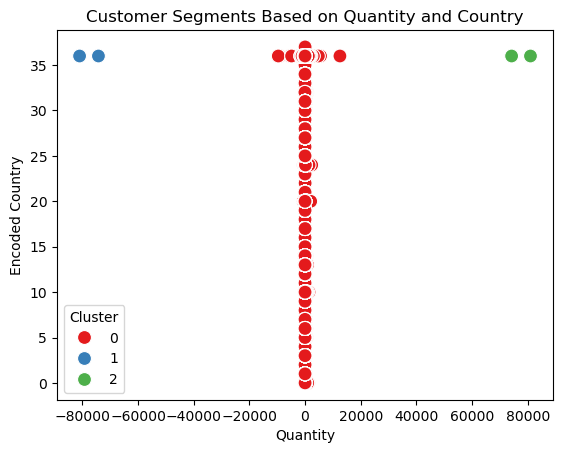

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("D:/online_retail.csv")
df_clean = df.dropna(subset=['Quantity', 'Country'])
label_encoder = LabelEncoder()
df_clean['Country_encoded'] = label_encoder.fit_transform(df_clean['Country'])
features = df_clean[['Quantity', 'Country_encoded']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(features)
print(df_clean.head())
cluster_1_quantity = df_clean[df_clean['Cluster'] == 0]['Quantity']
cluster_2_quantity = df_clean[df_clean['Cluster'] == 1]['Quantity']
t_stat, p_val = stats.ttest_ind(cluster_1_quantity, cluster_2_quantity)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")
sns.scatterplot(data=df_clean, x='Quantity', y='Country_encoded', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments Based on Quantity and Country')
plt.xlabel('Quantity')
plt.ylabel('Encoded Country')
plt.legend(title='Cluster')
plt.show()